In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from scipy.stats import linregress
from IPython.display import display

from plot_funcs import get_results, get_inter_pipe_df, get_intra_pipeline_df
from funcs import save_stats_summary

In [2]:
results = get_results('../exp/results')
static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 77580 Incomplete: 0


### First compare un-thresholded versions of intra pipe

Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     4.023033e-01
Size                             9.904470e-124
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     571.4
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.97e-122
Time:                        11:50:33   Log-Likelihood:                 416.06
No. Observations:                 438   AIC:                            -826.1
Df Residuals:                     435   BIC:                            -813.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.5013      0.016    157.451      0.000       2.470       2.533
C(Pipeline)[T.Elastic-Net FS]    -0.0075      0.009     -0.838      0.402      -0.025       0.010
Size                             -0.2119      0.006    -33.793      0.000      -0.224      -0.200
==============================================================================
Omnibus:                       19.292   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.007
Skew:                          -0.480   Prob(JB):                     2.74e-05
Kurtosis:                       3.481   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

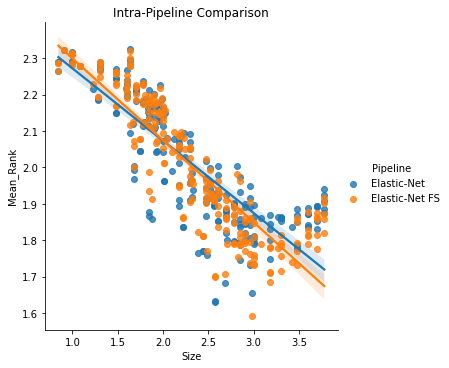

In [3]:
# Get intra pipe between just elastic and elastic FS for comparison
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['elastic', 'elasticFS'],
                                      threshold=False, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Intra-Pipeline Comparison')
plt.savefig('Figures/intra_elastic_vs_fs_no_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_elastic_vs_fs_no_threshold')
print(model.pvalues)
model.summary()

### Then a power-law thresholded version, still intra pipe

0 -25
Smallest size: 7.0
Largest size: 2000.0
3 -25
Smallest size: 8.0
Largest size: 2000.0
Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     8.984074e-01
Size                             9.809261e-134
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     743.5
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.98e-132
Time:                        11:50:35   Log-Likelihood:                 424.94
No. Observations:                 385   AIC:                            -843.9
Df Residuals:                     382   BIC:                            -832.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.6178      0.016    159.922      0.000       2.586       2.650
C(Pipeline)[T.Elastic-Net FS]    -0.0010      0.008     -0.128      0.898      -0.017       0.015
Size                             -0.2730      0.007    -38.551      0.000      -0.287      -0.259
==============================================================================
Omnibus:                       43.516   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.265
Skew:                          -0.838   Prob(JB):                     6.06e-13
Kurtosis:                       3.838   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

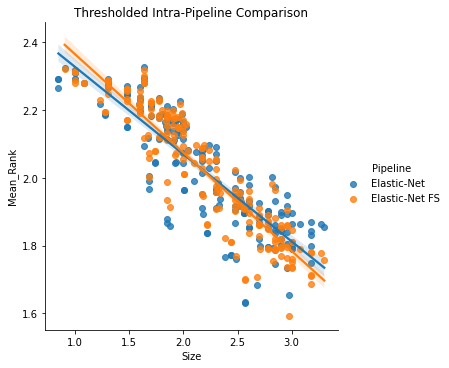

In [4]:
# Get intra pipe between just elastic and elastic FS for comparison
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      models=['elastic', 'elasticFS'],
                                      threshold=True, **static)
# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Thresholded Intra-Pipeline Comparison')
plt.savefig('Figures/intra_elastic_vs_fs_threshold.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_elastic_vs_fs_threshold')
print(model.pvalues)
model.summary()

### Now do inter-pipe comparison

Intercept                         0.000000e+00
C(Pipeline)[T.Elastic-Net FS]     7.857846e-02
Size                             7.267380e-124
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     573.6
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.09e-122
Time:                        11:50:37   Log-Likelihood:                 416.18
No. Observations:                 438   AIC:                            -826.4
Df Residuals:                     435   BIC:                            -814.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.7899      0.016    175.666      0.000       2.759       2.821
C(Pipeline)[T.Elastic-Net FS]     0.0158      0.009      1.763      0.079      -0.002       0.033
Size                             -0.2120      0.006    -33.827      0.000      -0.224      -0.200
==============================================================================
Omnibus:                       18.356   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.893
Skew:                          -0.465   Prob(JB):                     4.79e-05
Kurtosis:                       3.476   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

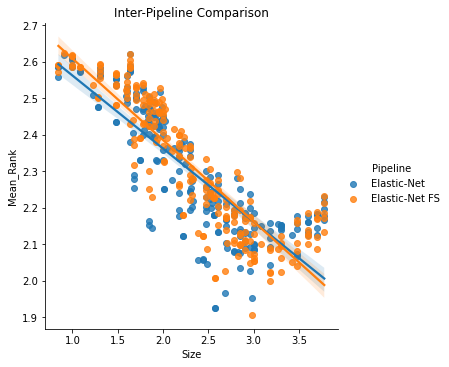

In [5]:
# Get df
inter_pipe_df = get_inter_pipe_df(results,
                                  models=['elastic', 'elasticFS'],
                                  log=True,
                                  **static)

# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=inter_pipe_df)
plt.title('Inter-Pipeline Comparison')
plt.savefig('Figures/inter_elastic_vs_fs.png', dpi=200, bbox_inches='tight')

# Stats
model = ols('Mean_Rank ~ Size + C(Pipeline)', data=inter_pipe_df).fit()
save_stats_summary(model, 'inter_elastic_vs_fs')
print(model.pvalues)
model.summary()